<a href="https://colab.research.google.com/github/Himatora/project_analitics/blob/master/%D0%A7%D0%B8%D1%81%D1%82%D0%BA%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек

In [1]:
import pandas as pd

Считываем данные

In [2]:
students = pd.read_csv('/content/export studs (1).csv', sep=';',
                      encoding='windows-1251')

In [3]:
attendance = pd.read_csv('/content/Result_2.csv', sep=',',
                      encoding='windows-1251')

In [4]:
students

,Faculty,Faculty_ID,Speciality,Speciality_ID,Group,Student_ID,Birthday,Is_Academic,Discipline_ID,Discipline,Result_ID,Result
0,Байкальский институт БРИКС,50,Возобновляемая энергетика / Renewable energy,859,ВЭАм-24,2460979,13.09.2000,0,19992,Аварийные режимы в электроэнергетических систе...,3.0,3
1,Байкальский институт БРИКС,50,Возобновляемая энергетика / Renewable energy,859,ВЭАм-24,2460979,13.09.2000,0,17359,Академическое письмо / Academic Writing,6.0,Зачтено
2,Байкальский институт БРИКС,50,Возобновляемая энергетика / Renewable energy,859,ВЭАм-24,2460979,13.09.2000,0,20051,Аналоговые и цифровые системы измерений / Anal...,6.0,Зачтено
3,Байкальский институт БРИКС,50,Возобновляемая энергетика / Renewable energy,859,ВЭАм-24,2460979,13.09.2000,0,20129,Возобновляемые энергоресурсы / Renewable energ...,4.0,4
4,Байкальский институт БРИКС,50,Возобновляемая энергетика / Renewable energy,859,ВЭАм-24,2460979,13.09.2000,0,20229,Защита и управление распределенной генерацией ...,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
465633,Центр образовательных программ магистратуры и ...,55,Энергетические системы и комплексы,951,аЭНК-24,2473476,24.07.2000,0,13594,История и философия науки,4.0,4
465634,Центр образовательных программ магистратуры и ...,55,Энергетические системы и комплексы,951,аЭНК-24,2473476,24.07.2000,0,22583,Подготовительный этап выполнения научного иссл...,5.0,5
465635,Центр образовательных программ магистратуры и ...,55,Энергетические системы и комплексы,951,аЭНК-24,2473479,23.07.2000,0,3254,Иностранный язык,5.0,5
465636,Центр образовательных программ магистратуры и ...,55,Энергетические системы и комплексы,951,аЭНК-24,2473479,23.07.2000,0,13594,История и философия науки,4.0,4


In [5]:
attendance

,id,lesson_id,value,student,created_at,updated_at,user_id,work_id,advertisement_items_ids,discipline_id
0,501,551,1.0,2438882,2024-03-19 05:18:26.965851 +00:00,2024-03-19 05:18:26.965905 +00:00,NaN,NaN,NaN,18
1,506,551,1.0,2433670,2024-03-19 05:18:58.924558 +00:00,2024-03-19 05:18:58.924627 +00:00,NaN,NaN,NaN,18
2,99,42,1.0,2443930,2024-03-12 06:19:27.320665 +00:00,2024-03-12 06:19:27.320716 +00:00,NaN,NaN,NaN,2
3,511,551,NaN,2432303,2024-03-19 05:19:17.082448 +00:00,2024-03-19 05:19:17.551402 +00:00,NaN,NaN,NaN,18
4,516,551,1.0,2434755,2024-03-19 05:19:40.948376 +00:00,2024-03-19 05:19:40.948425 +00:00,NaN,NaN,NaN,18
...,...,...,...,...,...,...,...,...,...,...
1929803,1932134,229538,1.0,2453257,2025-11-13 02:27:40.548338 +00:00,2025-11-13 02:27:40.548359 +00:00,3174.0,NaN,NaN,290
1929804,1932135,226326,1.0,2430390,2025-11-13 02:27:43.650133 +00:00,2025-11-13 02:27:43.650155 +00:00,5499.0,NaN,NaN,1265
1929805,1932136,226326,1.0,2432476,2025-11-13 02:28:04.323727 +00:00,2025-11-13 02:28:04.323750 +00:00,5499.0,NaN,NaN,1265
1929806,1932137,226325,1.0,2432476,2025-11-13 02:28:12.939114 +00:00,2025-11-13 02:28:12.939136 +00:00,5499.0,NaN,NaN,1265


In [6]:
print("Данные до очистки:")
print(f"Размерность: {attendance.shape}")
print(f"Общее количество пропусков: {attendance.isnull().sum().sum()}")

Данные до очистки:
Размерность: (1929808, 10)
Общее количество пропусков: 3436787


In [7]:
print("Данные до очистки:")
print(f"Размерность: {students.shape}")
print(f"Общее количество пропусков: {students.isnull().sum().sum()}")

Данные до очистки:
Размерность: (465638, 12)
Общее количество пропусков: 2


In [8]:
print(f"Исходный размер данных: {students.shape}")

# Проверяем количество пропусков
missing_count = students.isnull().sum().sum()

if missing_count > 0:
    rows_with_missing = students[students.isnull().any(axis=1)]
    print(f"Строки с пропусками: {len(rows_with_missing)}")
    print(rows_with_missing)

# Удаляем строки с пропусками
students_clean = students.dropna()

print(f"Размер данных после удаления строк с пропусками: {students_clean.shape}")
print(f"Пропусков осталось: {students_clean.isnull().sum().sum()}")

Исходный размер данных: (465638, 12)
Строки с пропусками: 1
                                   Faculty  Faculty_ID  \
164730  Институт заочно-вечернего обучения          15   

                                  Speciality  Speciality_ID    Group  \
164730  Автомобили и автомобильное хозяйство            629  ААбз-23   

        Student_ID    Birthday  Is_Academic  Discipline_ID  \
164730     2456219  19.08.1998            0          11272   

                                      Discipline  Result_ID Result  
164730  Введение в профессиональную деятельность        NaN    NaN  
Размер данных после удаления строк с пропусками: (465637, 12)
Пропусков осталось: 0


Обработка данных

ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:
Общий размер данных: (1929808, 10)
Всего ячеек: 19298080
Пропущенных значений: 3436787
Процент пропусков: 17.81%

АНАЛИЗ ПО СТОЛБЦАМ:
                         Пропуски  Процент Тип данных
work_id                   1925978    99.80    float64
advertisement_items_ids   1508185    78.15     object
value                        1588     0.08    float64
user_id                      1036     0.05    float64
lesson_id                       0     0.00      int64
id                              0     0.00      int64
updated_at                      0     0.00     object
created_at                      0     0.00     object
student                         0     0.00      int64
discipline_id                   0     0.00      int64


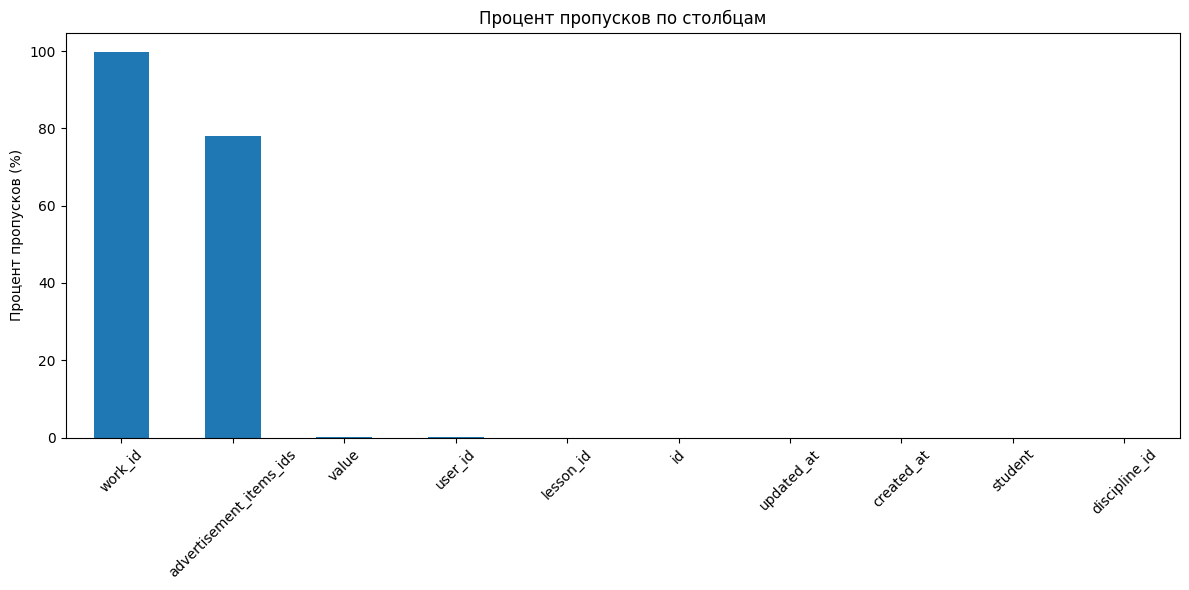


АНАЛИЗ СТРОК:
Строк без пропусков: 414
Строк с хотя бы одним пропуском: 1929394

Распределение пропусков по строкам:
  0 пропусков: 414 строк
  1 пропусков: 424573 строк
  2 пропусков: 1502402 строк
  3 пропусков: 2266 строк
  4 пропусков: 153 строк

ЭКСТРЕМАЛЬНЫЕ СЛУЧАИ:
Полностью пустых строк: 0
Полностью пустых столбцов: 0

Столбцов с >80% пропусков: 1
  work_id: 99.80%

АНАЛИЗ ПАТТЕРНОВ ПРОПУСКОВ:
Корреляции пропусков между столбцами (топ-5 пар):

ТИПЫ ДАННЫХ И ПРОПУСКИ:
Пропусков в числовых столбцах: 1928602
Пропусков в категориальных столбцах: 1508185

РЕКОМЕНДАЦИИ:
Общий процент пропусков: 17.81%
✅ НИЗКИЙ УРОВЕНЬ ПРОПУСКОВ - можно безопасно удалить пропуски

Столбцы-кандидаты на удаление (>80% пропусков):
  - work_id (99.8% пропусков)


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:")
print("=" * 50)

# 1. Общая информация
print(f"Общий размер данных: {attendance.shape}")
print(f"Всего ячеек: {attendance.shape[0] * attendance.shape[1]}")
print(f"Пропущенных значений: {attendance.isnull().sum().sum()}")
print(f"Процент пропусков: {(attendance.isnull().sum().sum() / (attendance.shape[0] * attendance.shape[1]) * 100):.2f}%")

# 2. Анализ по столбцам
print("\n" + "=" * 50)
print("АНАЛИЗ ПО СТОЛБЦАМ:")
print("=" * 50)

missing_by_column = attendance.isnull().sum()
missing_percent_by_column = (missing_by_column / len(attendance)) * 100

missing_df = pd.DataFrame({
    'Пропуски': missing_by_column,
    'Процент': missing_percent_by_column.round(2),
    'Тип данных': attendance.dtypes
})

print(missing_df.sort_values('Пропуски', ascending=False))

# 3. Визуализация пропусков по столбцам
plt.figure(figsize=(12, 6))
missing_percent_by_column.sort_values(ascending=False).plot(kind='bar')
plt.title('Процент пропусков по столбцам')
plt.ylabel('Процент пропусков (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Анализ строк с пропусками
print("\n" + "=" * 50)
print("АНАЛИЗ СТРОК:")
print("=" * 50)

# Количество пропусков в каждой строке
missing_per_row = attendance.isnull().sum(axis=1)
print(f"Строк без пропусков: {(missing_per_row == 0).sum()}")
print(f"Строк с хотя бы одним пропуском: {(missing_per_row > 0).sum()}")

# Распределение количества пропусков по строкам
print("\nРаспределение пропусков по строкам:")
missing_counts = missing_per_row.value_counts().sort_index()
for count, num_rows in missing_counts.head(10).items():
    print(f"  {count} пропусков: {num_rows} строк")

# 5. Анализ полностью пустых строк и столбцов
print("\n" + "=" * 50)
print("ЭКСТРЕМАЛЬНЫЕ СЛУЧАИ:")
print("=" * 50)

# Полностью пустые строки
empty_rows = attendance.isnull().all(axis=1).sum()
print(f"Полностью пустых строк: {empty_rows}")

# Полностью пустые столбцы
empty_cols = attendance.isnull().all(axis=0).sum()
print(f"Полностью пустых столбцов: {empty_cols}")

# Столбцы с очень высоким процентом пропусков
high_missing_cols = missing_percent_by_column[missing_percent_by_column > 80]
print(f"\nСтолбцов с >80% пропусков: {len(high_missing_cols)}")
for col, percent in high_missing_cols.items():
    print(f"  {col}: {percent:.2f}%")

# 6. Паттерны пропусков
print("\n" + "=" * 50)
print("АНАЛИЗ ПАТТЕРНОВ ПРОПУСКОВ:")
print("=" * 50)

# Проверяем, есть ли столбцы, которые пропускаются вместе
# (это может указывать на связанные данные)

# Создаем бинарную матрицу пропусков
missing_matrix = attendance.isnull()

# Считаем корреляции пропусков между столбцами
missing_corr = missing_matrix.corr()

print("Корреляции пропусков между столбцами (топ-5 пар):")
# Находим пары столбцов с высокой корреляцией пропусков
corr_pairs = []
cols = missing_corr.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        if abs(missing_corr.iloc[i, j]) > 0.3:  # порог корреляции
            corr_pairs.append((cols[i], cols[j], missing_corr.iloc[i, j]))

# Сортируем по абсолютному значению корреляции
corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
for col1, col2, corr in corr_pairs[:5]:
    print(f"  {col1} - {col2}: {corr:.3f}")

# 7. Анализ типов данных в столбцах с пропусками
print("\n" + "=" * 50)
print("ТИПЫ ДАННЫХ И ПРОПУСКИ:")
print("=" * 50)

numeric_missing = attendance.select_dtypes(include=[np.number]).isnull().sum().sum()
categorical_missing = attendance.select_dtypes(include=['object']).isnull().sum().sum()

print(f"Пропусков в числовых столбцах: {numeric_missing}")
print(f"Пропусков в категориальных столбцах: {categorical_missing}")

# 8. Рекомендации по обработке
print("\n" + "=" * 50)
print("РЕКОМЕНДАЦИИ:")
print("=" * 50)

total_cells = attendance.shape[0] * attendance.shape[1]
missing_percentage_total = (attendance.isnull().sum().sum() / total_cells) * 100

print(f"Общий процент пропусков: {missing_percentage_total:.2f}%")

if missing_percentage_total > 50:
    print("❌ ВЫСОКИЙ УРОВЕНЬ ПРОПУСКОВ - требуется тщательный анализ перед удалением")
    print("Рекомендации:")
    print("1. Проанализировать причины пропусков")
    print("2. Рассмотреть удаление столбцов с >80% пропусков")
    print("3. Для оставшихся - использовать интерполяцию/заполнение")
elif missing_percentage_total > 20:
    print("⚠️ СРЕДНИЙ УРОВЕНЬ ПРОПУСКОВ - требуется осторожная обработка")
    print("Рекомендации:")
    print("1. Удалить полностью пустые столбцы")
    print("2. Для частично заполненных - использовать умное заполнение")
else:
    print("✅ НИЗКИЙ УРОВЕНЬ ПРОПУСКОВ - можно безопасно удалить пропуски")

# Дополнительно: анализ конкретных проблемных столбцов
if not high_missing_cols.empty:
    print(f"\nСтолбцы-кандидаты на удаление (>80% пропусков):")
    for col in high_missing_cols.index:
        print(f"  - {col} ({high_missing_cols[col]:.1f}% пропусков)")

In [10]:
# Удаляем столбец work_id
if 'work_id' in attendance.columns:
    attendance = attendance.drop('work_id', axis=1)
    print(f"Столбец 'work_id' удален. Новая размерность данных: {attendance.shape}")
else:
    print("Столбец 'work_id' не найден в данных")
    # Удаляем столбец work_id
if 'advertisement_items_ids' in attendance.columns:
    attendance = attendance.drop('advertisement_items_ids', axis=1)
    print(f"Столбец 'advertisement_items_ids' удален. Новая размерность данных: {attendance.shape}")
else:
    print("Столбец 'advertisement_items_ids' не найден в данных")

Столбец 'work_id' удален. Новая размерность данных: (1929808, 9)
Столбец 'advertisement_items_ids' удален. Новая размерность данных: (1929808, 8)


In [11]:
print("ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:")
print("=" * 50)

# 1. Общая информация
print(f"Общий размер данных: {attendance.shape}")
print(f"Всего ячеек: {attendance.shape[0] * attendance.shape[1]}")
print(f"Пропущенных значений: {attendance.isnull().sum().sum()}")
print(f"Процент пропусков: {(attendance.isnull().sum().sum() / (attendance.shape[0] * attendance.shape[1]) * 100):.2f}%")

ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:
Общий размер данных: (1929808, 8)
Всего ячеек: 15438464
Пропущенных значений: 2624
Процент пропусков: 0.02%


Нужна расшифровка данных, т.к. непонятна важность пустых столбцов. Нужно понять, за что отвечает user_id,work_id и value.

In [12]:
# Удаляем строки с любыми пропусками
attendance = attendance.dropna()

print(f"Размер после удаления строк с пропусками: {attendance.shape}")
print(f"Удалено строк: {attendance.shape[0] - attendance.shape[0]}")
print(f"Осталось пропусков: {attendance.isnull().sum().sum()}")

# Проверяем, что действительно нет пропусков
if attendance.isnull().sum().sum() == 0:
    print("✅ Все строки с пропусками успешно удалены!")
else:
    print("⚠️ В данных остались пропуски")

Размер после удаления строк с пропусками: (1927337, 8)
Удалено строк: 0
Осталось пропусков: 0
✅ Все строки с пропусками успешно удалены!


Сохраняем данные

In [13]:
students.to_csv('cleaned_students.csv', index=False, sep=';', encoding='windows-1251')
attendance.to_csv('cleaned_attendance.csv', index=False, sep=';', encoding='windows-1251')

In [14]:
attendance

,id,lesson_id,value,student,created_at,updated_at,user_id,discipline_id
123,3616,1952,1.0,2451037,2024-03-22 06:11:24.319053 +00:00,2024-03-22 06:11:24.319102 +00:00,98.0,64
214,190,23,1.0,2447881,2024-03-13 09:11:36.141218 +00:00,2024-03-22 03:59:11.940877 +00:00,16.0,2
358,197,49,1.0,2442329,2024-03-13 09:12:09.499294 +00:00,2024-03-22 04:00:36.309622 +00:00,16.0,2
371,3617,1952,1.0,2452545,2024-03-22 06:11:25.587612 +00:00,2024-03-22 06:11:25.587660 +00:00,98.0,64
372,200,49,1.0,2442063,2024-03-13 09:12:11.223003 +00:00,2024-03-22 04:00:44.495379 +00:00,16.0,2
...,...,...,...,...,...,...,...,...
1929803,1932134,229538,1.0,2453257,2025-11-13 02:27:40.548338 +00:00,2025-11-13 02:27:40.548359 +00:00,3174.0,290
1929804,1932135,226326,1.0,2430390,2025-11-13 02:27:43.650133 +00:00,2025-11-13 02:27:43.650155 +00:00,5499.0,1265
1929805,1932136,226326,1.0,2432476,2025-11-13 02:28:04.323727 +00:00,2025-11-13 02:28:04.323750 +00:00,5499.0,1265
1929806,1932137,226325,1.0,2432476,2025-11-13 02:28:12.939114 +00:00,2025-11-13 02:28:12.939136 +00:00,5499.0,1265


In [15]:
# Группируем по студенту и предмету
result = attendance.groupby(['student', 'discipline_id']).agg(
    total_lessons=('value', 'count'),  # общее количество занятий
    attended_lessons=('value', lambda x: (x > 0).sum())  # занятия с value > 0
).reset_index()

# Вычисляем процент посещений
result['attendance_percentage'] = round(
    (result['attended_lessons'] / result['total_lessons']) * 100, 2
)

# Сортируем для удобства просмотра
result = result.sort_values(['student', 'discipline_id'])

# Выводим результат
print(result)
print(f"Всего уникальных студентов: {result['student'].nunique()}")
print(f"Всего уникальных предметов: {result['discipline_id'].nunique()}")

# Если нужно сохранить в файл:
result.to_csv('attendance_summary.csv', index=False)

        student  discipline_id  total_lessons  attended_lessons  \
0             0              1              1                 1   
1             0              3              1                 1   
2             0              8              2                 2   
3             0             10              1                 1   
4             0             11              3                 3   
...         ...            ...            ...               ...   
173490  2491981            469              2                 0   
173491  2491986             11              1                 0   
173492  2491986            270              1                 0   
173493  2491986            321              1                 0   
173494  2491986            339              1                 1   

        attendance_percentage  
0                       100.0  
1                       100.0  
2                       100.0  
3                       100.0  
4                       100.0  
...

In [21]:
# Создаем сводную таблицу посещений (как в предыдущем ответе)
attendance_summary = (
    attendance.groupby(['student', 'discipline_id'])
    .agg(
        total_lessons=('value', 'count'),
        attended_lessons=('value', lambda x: (x > 0).sum())
    )
    .reset_index()
)

# Вычисляем процент посещений
attendance_summary['attendance_percentage'] = round(
    (attendance_summary['attended_lessons'] / attendance_summary['total_lessons']) * 100, 2
)

# Объединяем с таблицей студентов
result = pd.merge(
    attendance_summary,
    students[['Student_ID', 'Discipline_ID', 'Is_Academic', 'Result_ID']],
    left_on=['student', 'discipline_id'],
    right_on=['Student_ID', 'Discipline_ID'],
    how='left'  # left join чтобы сохранить все записи из attendance_summary
)

# Удаляем дублирующиеся столбцы после объединения
result = result.drop(['Student_ID', 'Discipline_ID'], axis=1)

# Сортируем результат
result = result.sort_values(['student', 'discipline_id'])

print(result.head())
print(f"\nРазмер итоговой таблицы: {result.shape}")


   student  discipline_id  total_lessons  attended_lessons  \
0        0              1              1                 1   
1        0              3              1                 1   
2        0              8              2                 2   
3        0             10              1                 1   
4        0             11              3                 3   

   attendance_percentage  Is_Academic  Result_ID  
0                  100.0          NaN        NaN  
1                  100.0          NaN        NaN  
2                  100.0          NaN        NaN  
3                  100.0          NaN        NaN  
4                  100.0          NaN        NaN  

Размер итоговой таблицы: (173529, 7)


In [23]:
result = result.dropna()
print(result.head())
print(f"\nРазмер итоговой таблицы: {result.shape}")


     student  discipline_id  total_lessons  attended_lessons  \
234  2340967           3666              1                 0   
235  2340967           3666              1                 0   
694  2371802           3259              1                 1   
695  2371802           3259              1                 1   
696  2371802           3260              1                 1   

     attendance_percentage  Is_Academic  Result_ID  
234                    0.0          0.0        6.0  
235                    0.0          0.0        0.0  
694                  100.0          0.0        0.0  
695                  100.0          0.0        6.0  
696                  100.0          0.0        0.0  

Размер итоговой таблицы: (104, 7)


Анализ данных

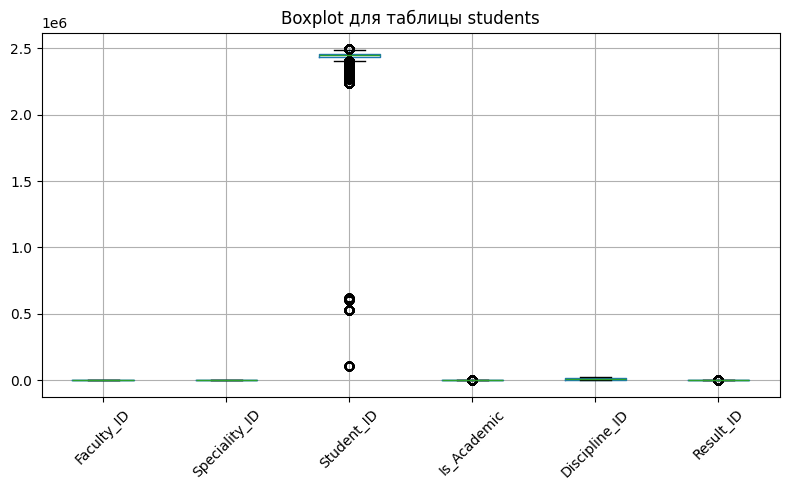

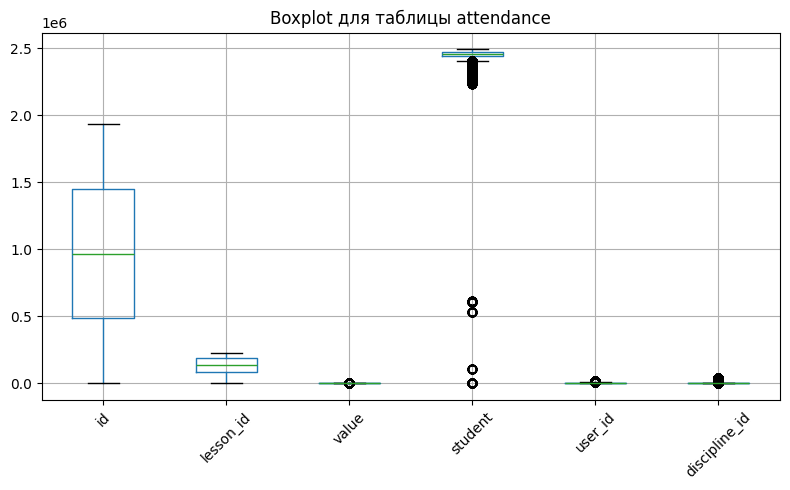

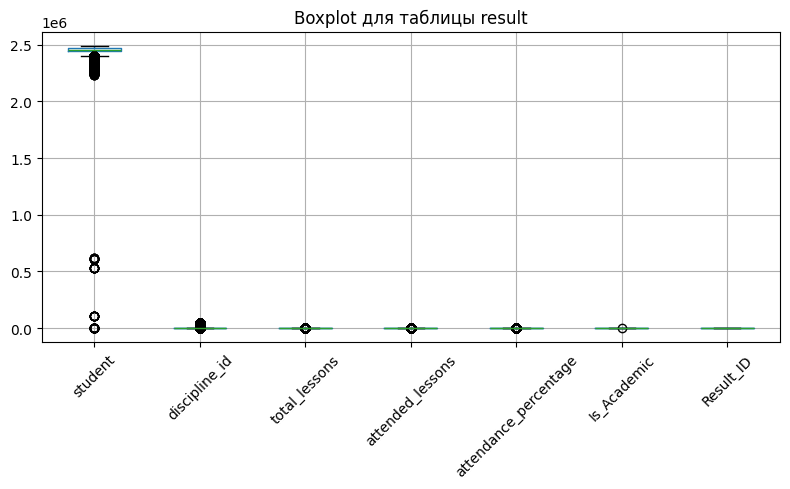

In [17]:
def create_boxplot(data, title):
    numeric_data = data.select_dtypes(include='number')  # Только числовые столбцы
    if numeric_data.empty:
        print(f"В таблице {title} нет числовых данных для построения графика.")
        return

    plt.figure(figsize=(8, 5))
    numeric_data.boxplot()
    plt.title(f'Boxplot для таблицы {title}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Построение графиков для каждой таблицы
create_boxplot(students, 'students')
create_boxplot(attendance, 'attendance')
create_boxplot(result, 'result')

In [19]:
print("ПОЛНАЯ СТАТИСТИЧЕСКАЯ СВОДКА:")
print("\nstudents (числовые столбцы):")
with pd.option_context('display.float_format', '{:.2f}'.format):
    print(students.select_dtypes(include='number').describe())

print("\nattendance (числовые столбцы):")
with pd.option_context('display.float_format', '{:.2f}'.format):
    print(attendance.select_dtypes(include='number').describe())

print("\nresult (числовые столбцы):")
with pd.option_context('display.float_format', '{:.2f}'.format):
    print(result.select_dtypes(include='number').describe())

ПОЛНАЯ СТАТИСТИЧЕСКАЯ СВОДКА:

students (числовые столбцы):
       Faculty_ID  Speciality_ID  Student_ID  Is_Academic  Discipline_ID  \
count   465638.00      465638.00   465638.00    465638.00      465638.00   
mean        30.99         706.78  2441208.02         0.05       10002.81   
std         12.92         143.63    58668.73         0.22        6400.02   
min         15.00         484.00   106395.00         0.00        3254.00   
25%         15.00         588.00  2434029.00         0.00        3869.00   
50%         34.00         626.00  2445230.00         0.00        7792.00   
75%         43.00         839.00  2456179.00         0.00       15576.00   
max         69.00        1024.00  2491920.00         1.00       24510.00   

       Result_ID  
count  465637.00  
mean        4.31  
std         1.94  
min        -3.00  
25%         4.00  
50%         5.00  
75%         6.00  
max         6.00  

attendance (числовые столбцы):
              id  lesson_id      value    student   

In [26]:
attendance_summary = pd.read_csv('/content/attendance_summary.csv', sep=',',
                      encoding='windows-1251')

In [27]:
attendance_summary

,student,discipline_id,total_lessons,attended_lessons,attendance_percentage
0,0,1,1,1,100.0
1,0,3,1,1,100.0
2,0,8,2,2,100.0
3,0,10,1,1,100.0
4,0,11,3,3,100.0
...,...,...,...,...,...
173490,2491981,469,2,0,0.0
173491,2491986,11,1,0,0.0
173492,2491986,270,1,0,0.0
173493,2491986,321,1,0,0.0


АНАЛИЗ КОРРЕЛЯЦИЙ МЕЖДУ ПЕРЕМЕННЫМИ

МАТРИЦА КОРРЕЛЯЦИИ: Attendance Summary
Размер таблицы: (173495, 5)
Числовые столбцы: ['student', 'discipline_id', 'total_lessons', 'attended_lessons', 'attendance_percentage']


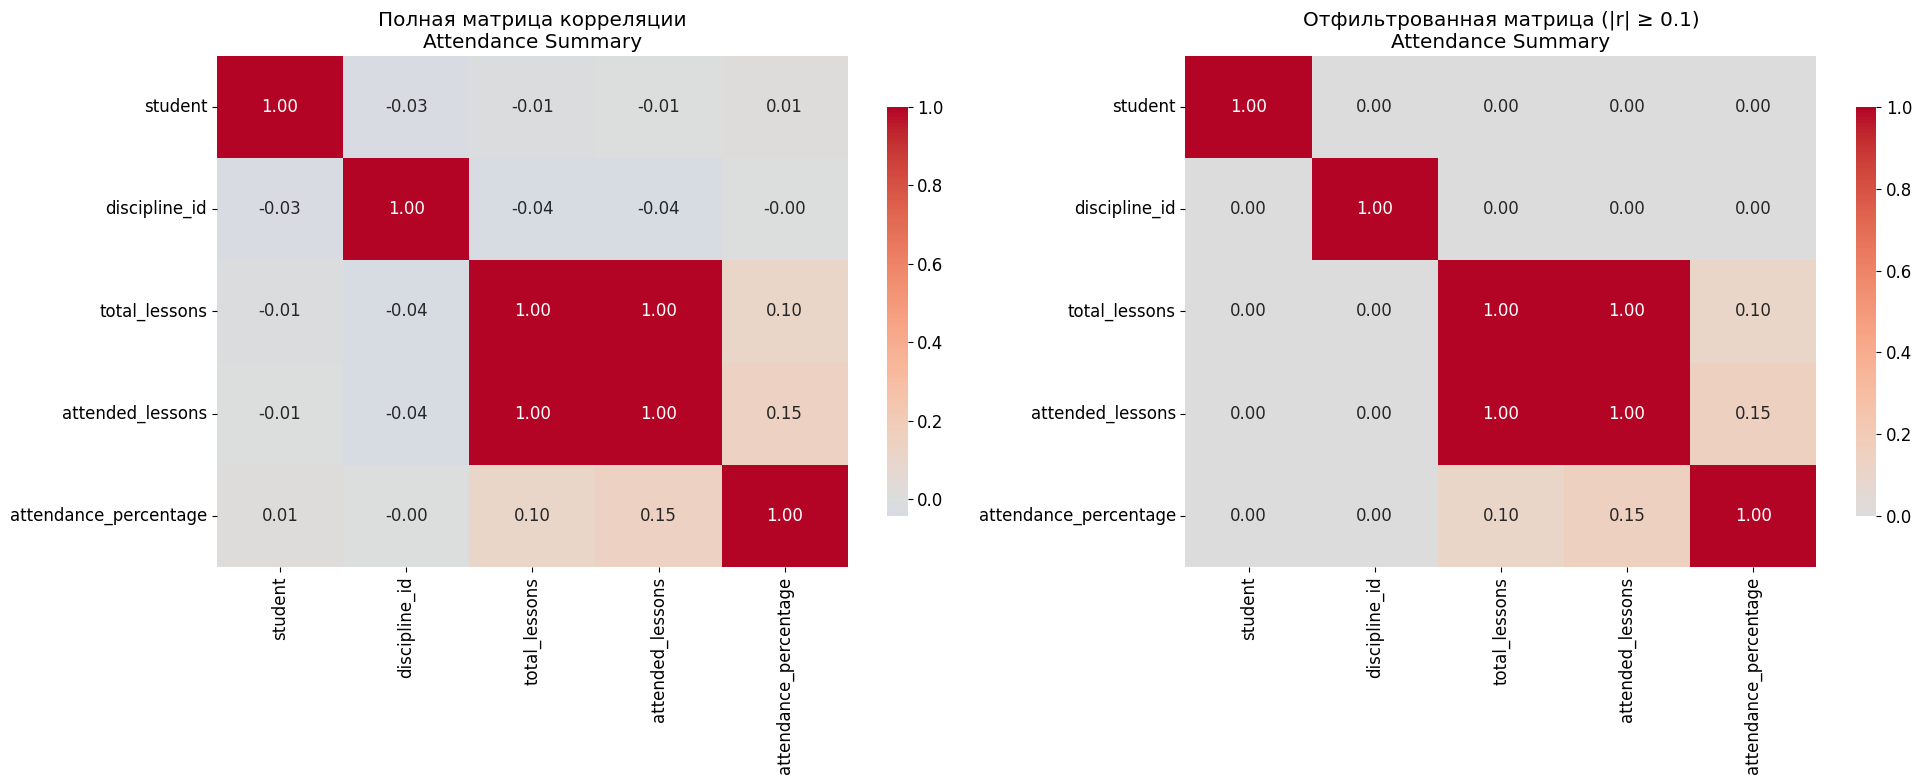


СИЛЬНЫЕ КОРРЕЛЯЦИИ (|r| ≥ 0.5):
  total_lessons ↔ attended_lessons: 0.997 (положительная)

ТОП-10 КОРРЕЛЯЦИЙ ДЛЯ Attendance Summary:
 1. total_lessons        ↑↑ attended_lessons     :   0.997 (ОЧЕНЬ СИЛЬНАЯ)
 2. attended_lessons     ↑↑ attendance_percentage :   0.148 (ОЧЕНЬ СЛАБАЯ)
 3. total_lessons        ↑↑ attendance_percentage :   0.105 (ОЧЕНЬ СЛАБАЯ)
 4. discipline_id        ↑↓ attended_lessons     :  -0.043 (ОЧЕНЬ СЛАБАЯ)
 5. discipline_id        ↑↓ total_lessons        :  -0.043 (ОЧЕНЬ СЛАБАЯ)
 6. student              ↑↓ discipline_id        :  -0.033 (ОЧЕНЬ СЛАБАЯ)
 7. student              ↑↑ attendance_percentage :   0.013 (ОЧЕНЬ СЛАБАЯ)
 8. student              ↑↓ total_lessons        :  -0.006 (ОЧЕНЬ СЛАБАЯ)
 9. student              ↑↓ attended_lessons     :  -0.006 (ОЧЕНЬ СЛАБАЯ)
10. discipline_id        ↑↓ attendance_percentage :  -0.004 (ОЧЕНЬ СЛАБАЯ)

МАТРИЦА КОРРЕЛЯЦИИ: Students Table
Размер таблицы: (465638, 12)
Числовые столбцы: ['Faculty_ID', 'Speciality_ID', 'Stude

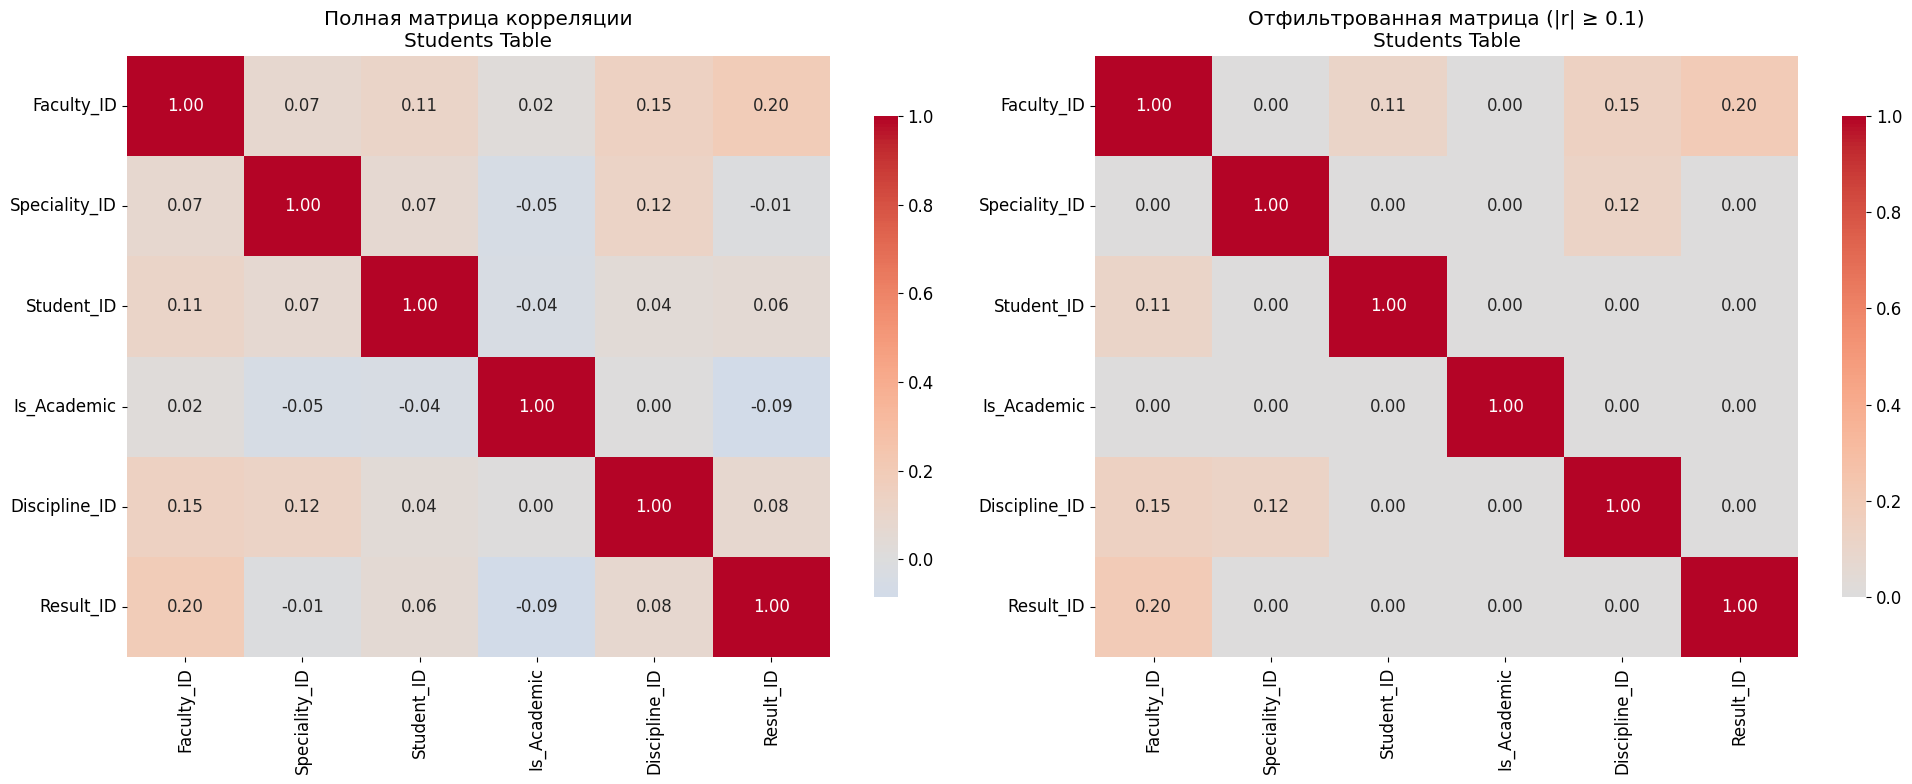


СИЛЬНЫЕ КОРРЕЛЯЦИИ (|r| ≥ 0.5):
  Нет сильных корреляций (|r| ≥ 0.5)

ТОП-10 КОРРЕЛЯЦИЙ ДЛЯ Students Table:
 1. Faculty_ID           ↑↑ Result_ID            :   0.198 (ОЧЕНЬ СЛАБАЯ)
 2. Faculty_ID           ↑↑ Discipline_ID        :   0.146 (ОЧЕНЬ СЛАБАЯ)
 3. Speciality_ID        ↑↑ Discipline_ID        :   0.124 (ОЧЕНЬ СЛАБАЯ)
 4. Faculty_ID           ↑↑ Student_ID           :   0.112 (ОЧЕНЬ СЛАБАЯ)
 5. Is_Academic          ↑↓ Result_ID            :  -0.086 (ОЧЕНЬ СЛАБАЯ)
 6. Discipline_ID        ↑↑ Result_ID            :   0.077 (ОЧЕНЬ СЛАБАЯ)
 7. Faculty_ID           ↑↑ Speciality_ID        :   0.072 (ОЧЕНЬ СЛАБАЯ)
 8. Speciality_ID        ↑↑ Student_ID           :   0.066 (ОЧЕНЬ СЛАБАЯ)
 9. Student_ID           ↑↑ Result_ID            :   0.056 (ОЧЕНЬ СЛАБАЯ)
10. Speciality_ID        ↑↓ Is_Academic          :  -0.049 (ОЧЕНЬ СЛАБАЯ)

МАТРИЦА КОРРЕЛЯЦИИ: Attendance Table
Размер таблицы: (1927337, 8)
Числовые столбцы: ['id', 'lesson_id', 'value', 'student', 'user_id', 'discipline_id'

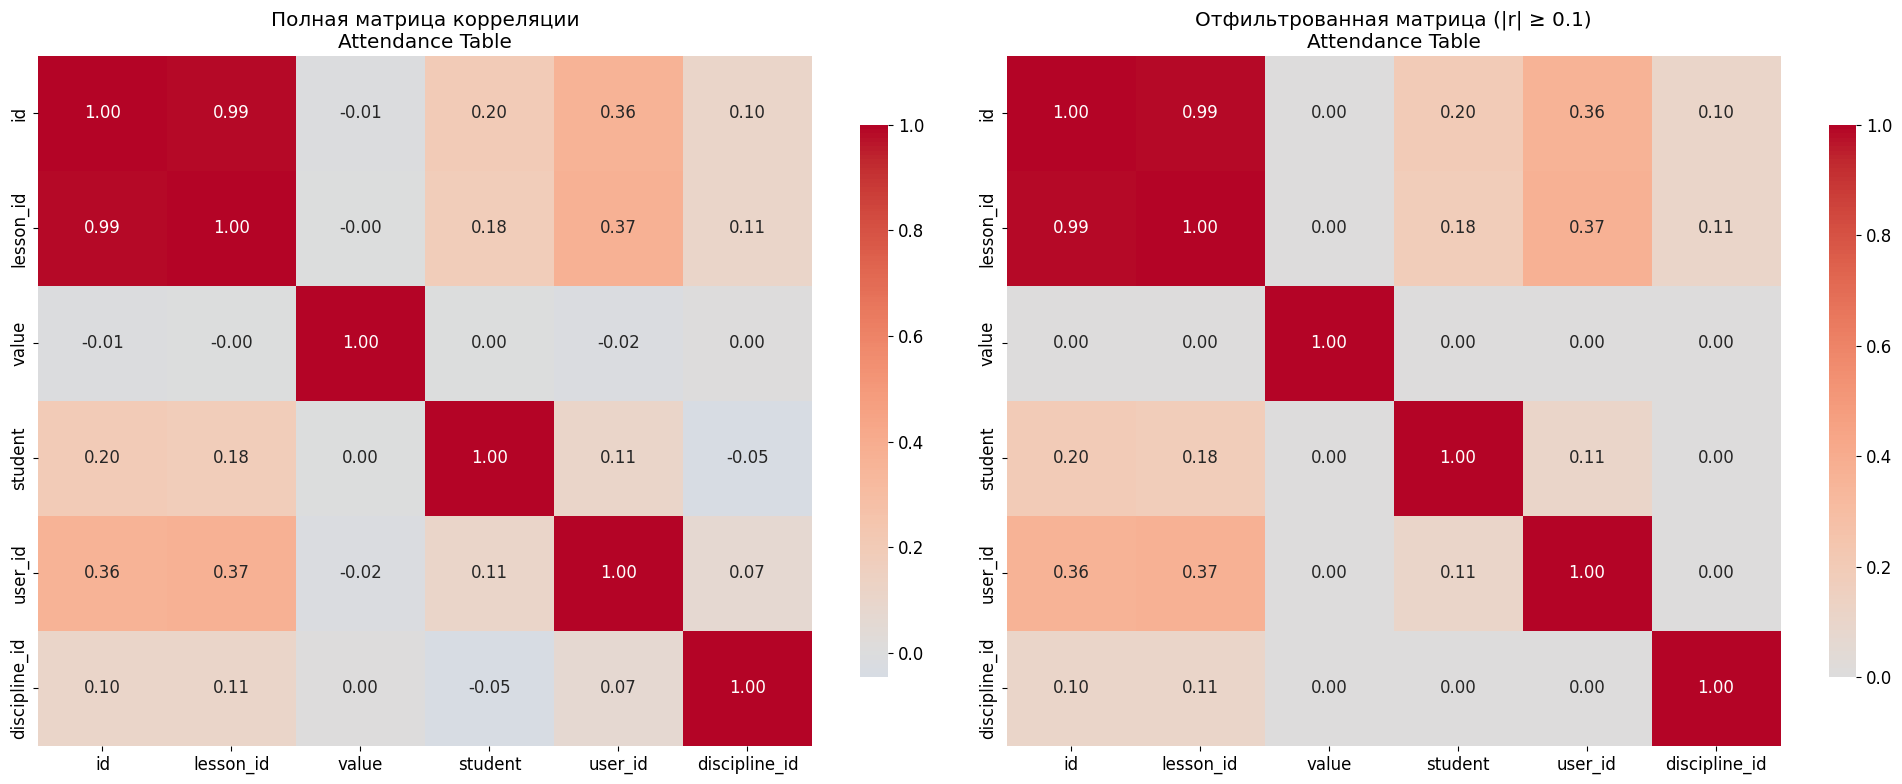


СИЛЬНЫЕ КОРРЕЛЯЦИИ (|r| ≥ 0.5):
  id ↔ lesson_id: 0.987 (положительная)

ТОП-10 КОРРЕЛЯЦИЙ ДЛЯ Attendance Table:
 1. id                   ↑↑ lesson_id            :   0.987 (ОЧЕНЬ СИЛЬНАЯ)
 2. lesson_id            ↑↑ user_id              :   0.369 (СЛАБАЯ)
 3. id                   ↑↑ user_id              :   0.363 (СЛАБАЯ)
 4. id                   ↑↑ student              :   0.196 (ОЧЕНЬ СЛАБАЯ)
 5. lesson_id            ↑↑ student              :   0.184 (ОЧЕНЬ СЛАБАЯ)
 6. lesson_id            ↑↑ discipline_id        :   0.109 (ОЧЕНЬ СЛАБАЯ)
 7. student              ↑↑ user_id              :   0.105 (ОЧЕНЬ СЛАБАЯ)
 8. id                   ↑↑ discipline_id        :   0.104 (ОЧЕНЬ СЛАБАЯ)
 9. user_id              ↑↑ discipline_id        :   0.067 (ОЧЕНЬ СЛАБАЯ)
10. student              ↑↓ discipline_id        :  -0.046 (ОЧЕНЬ СЛАБАЯ)

МАТРИЦА КОРРЕЛЯЦИИ: Result Table
Размер таблицы: (104, 7)
Числовые столбцы: ['student', 'discipline_id', 'total_lessons', 'attended_lessons', 'attendance_pe

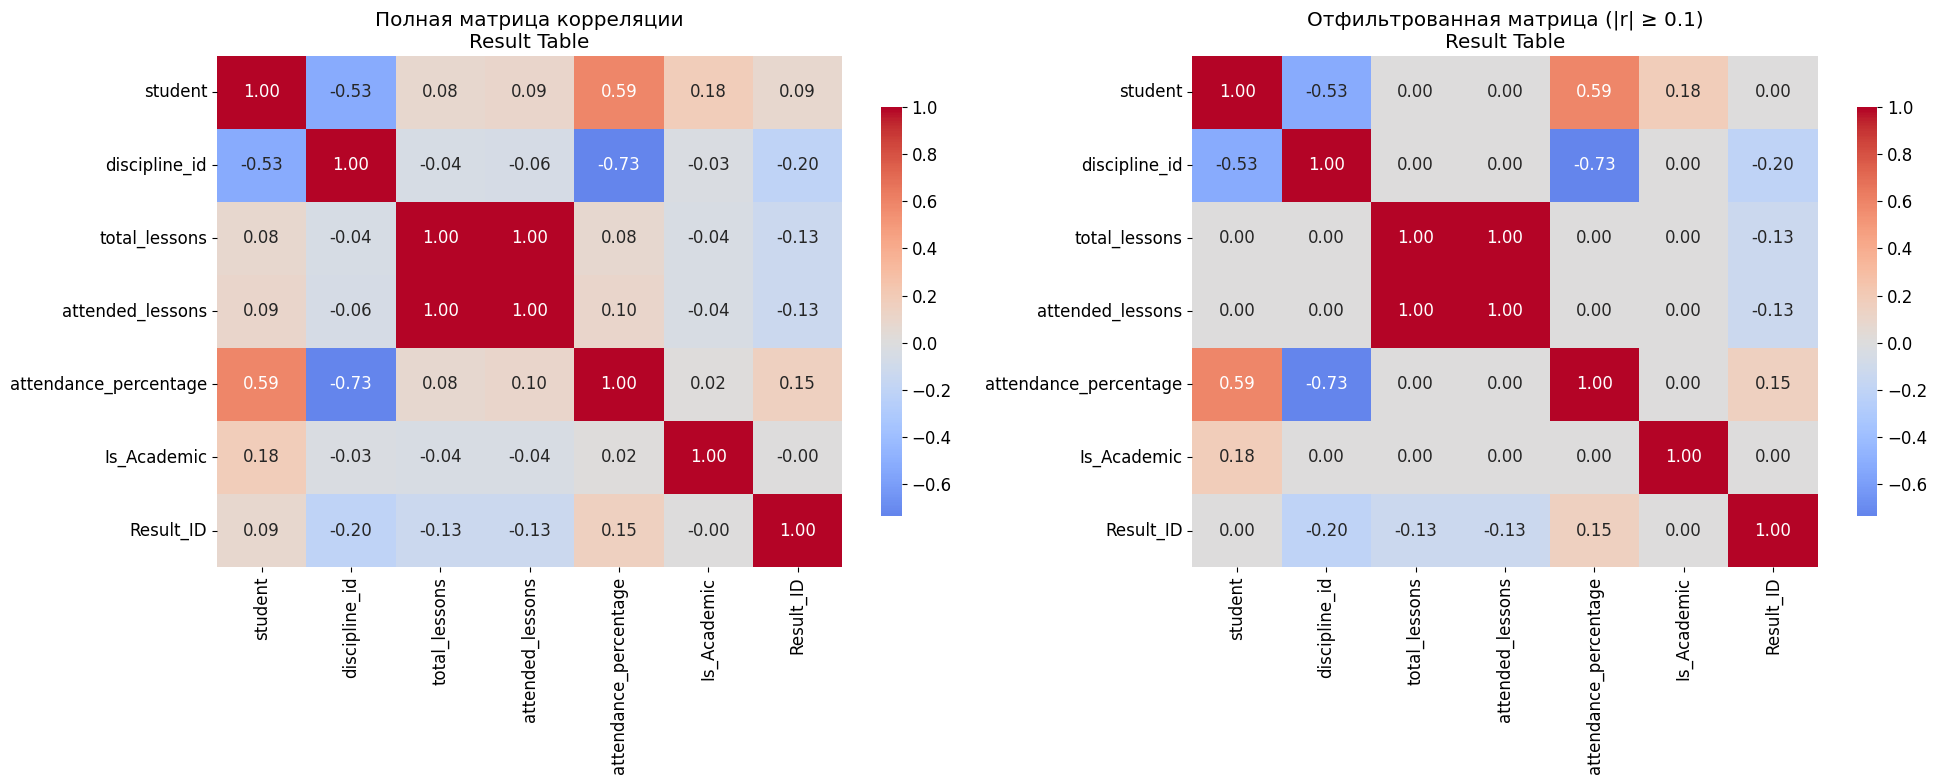


СИЛЬНЫЕ КОРРЕЛЯЦИИ (|r| ≥ 0.5):
  total_lessons ↔ attended_lessons: 1.000 (положительная)
  discipline_id ↔ attendance_percentage: -0.734 (отрицательная)
  student ↔ attendance_percentage: 0.592 (положительная)
  student ↔ discipline_id: -0.528 (отрицательная)

ТОП-10 КОРРЕЛЯЦИЙ ДЛЯ Result Table:
 1. total_lessons        ↑↑ attended_lessons     :   1.000 (ОЧЕНЬ СИЛЬНАЯ)
 2. discipline_id        ↑↓ attendance_percentage :  -0.734 (СИЛЬНАЯ)
 3. student              ↑↑ attendance_percentage :   0.592 (УМЕРЕННАЯ)
 4. student              ↑↓ discipline_id        :  -0.528 (УМЕРЕННАЯ)
 5. discipline_id        ↑↓ Result_ID            :  -0.202 (СЛАБАЯ)
 6. student              ↑↑ Is_Academic          :   0.185 (ОЧЕНЬ СЛАБАЯ)
 7. attendance_percentage ↑↑ Result_ID            :   0.150 (ОЧЕНЬ СЛАБАЯ)
 8. total_lessons        ↑↓ Result_ID            :  -0.130 (ОЧЕНЬ СЛАБАЯ)
 9. attended_lessons     ↑↓ Result_ID            :  -0.127 (ОЧЕНЬ СЛАБАЯ)
10. attended_lessons     ↑↑ attendance_percentag

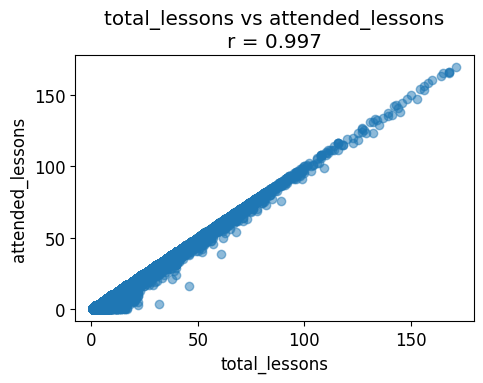


SCATTER PLOTS ДЛЯ СИЛЬНЫХ КОРРЕЛЯЦИЙ (|r| ≥ 0.7) В Attendance Table:


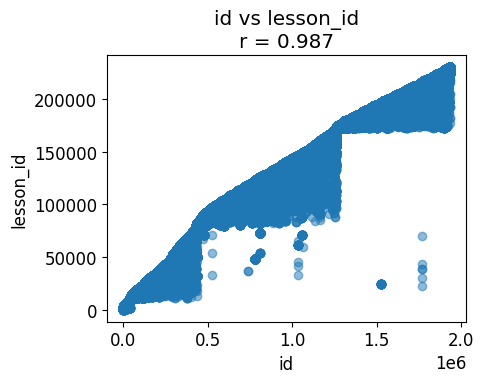


SCATTER PLOTS ДЛЯ СИЛЬНЫХ КОРРЕЛЯЦИЙ (|r| ≥ 0.7) В Result Table:


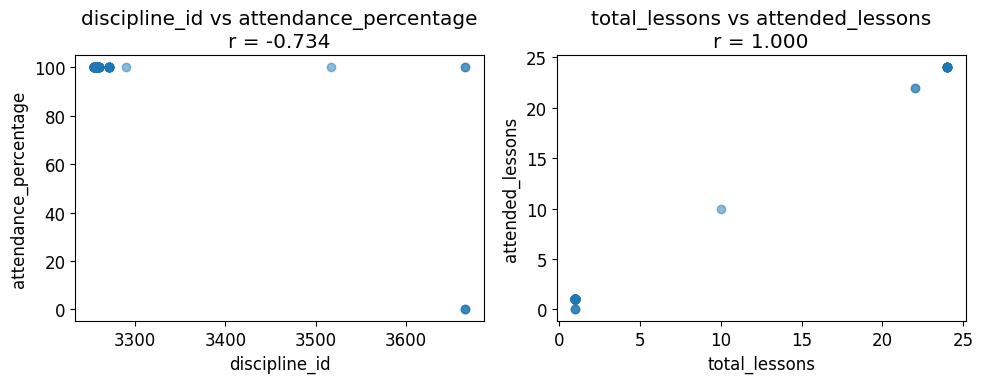


СВОДНЫЙ ОТЧЕТ ПО КОРРЕЛЯЦИЯМ

АНАЛИЗ КОРРЕЛЯЦИЙ ЗАВЕРШЕН!


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки отображения
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Функция для построения матрицы корреляции
def plot_correlation_matrix(df, title, threshold=0.1):
    """
    Построение матрицы корреляции с фильтрацией слабых корреляций
    """
    # Выбираем только числовые столбцы
    numeric_df = df.select_dtypes(include=[np.number])

    if numeric_df.empty:
        print(f"В таблице {title} нет числовых столбцов для анализа корреляции")
        return

    print(f"\n{'='*60}")
    print(f"МАТРИЦА КОРРЕЛЯЦИИ: {title}")
    print(f"Размер таблицы: {df.shape}")
    print(f"Числовые столбцы: {list(numeric_df.columns)}")
    print(f"{'='*60}")

    # Вычисляем матрицу корреляции
    corr_matrix = numeric_df.corr()

    # Фильтруем слабые корреляции для лучшей визуализации
    mask = np.abs(corr_matrix) < threshold
    filtered_corr = corr_matrix.copy()
    filtered_corr[mask] = 0

    # Создаем субплотовую сетку
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Полная матрица корреляции
    sns.heatmap(corr_matrix,
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.2f',
                ax=ax1,
                cbar_kws={'shrink': 0.8})
    ax1.set_title(f'Полная матрица корреляции\n{title}')

    # Отфильтрованная матрица корреляции
    sns.heatmap(filtered_corr,
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.2f',
                ax=ax2,
                cbar_kws={'shrink': 0.8})
    ax2.set_title(f'Отфильтрованная матрица (|r| ≥ {threshold})\n{title}')

    plt.tight_layout()
    plt.show()

    # Выводим сильные корреляции
    print("\nСИЛЬНЫЕ КОРРЕЛЯЦИИ (|r| ≥ 0.5):")
    strong_correlations = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) >= 0.5 and not pd.isna(corr_value):
                strong_correlations.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_value
                ))

    if strong_correlations:
        for col1, col2, corr in sorted(strong_correlations, key=lambda x: abs(x[2]), reverse=True):
            direction = "положительная" if corr > 0 else "отрицательная"
            print(f"  {col1} ↔ {col2}: {corr:.3f} ({direction})")
    else:
        print("  Нет сильных корреляций (|r| ≥ 0.5)")

    return corr_matrix

# Функция для анализа пар с наибольшей корреляцией
def analyze_top_correlations(corr_matrix, title, top_n=10):
    """
    Анализ пар переменных с наибольшей корреляцией
    """
    print(f"\nТОП-{top_n} КОРРЕЛЯЦИЙ ДЛЯ {title}:")

    # Собираем все пары корреляций
    correlations = []
    columns = corr_matrix.columns

    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            corr_value = corr_matrix.iloc[i, j]
            if not pd.isna(corr_value):
                correlations.append((columns[i], columns[j], corr_value))

    # Сортируем по абсолютному значению корреляции
    top_correlations = sorted(correlations, key=lambda x: abs(x[2]), reverse=True)[:top_n]

    for i, (col1, col2, corr) in enumerate(top_correlations, 1):
        direction = "↑↑" if corr > 0 else "↑↓"
        strength = "ОЧЕНЬ СИЛЬНАЯ" if abs(corr) >= 0.8 else \
                  "СИЛЬНАЯ" if abs(corr) >= 0.6 else \
                  "УМЕРЕННАЯ" if abs(corr) >= 0.4 else \
                  "СЛАБАЯ" if abs(corr) >= 0.2 else "ОЧЕНЬ СЛАБАЯ"

        print(f"{i:2d}. {col1:20} {direction} {col2:20} : {corr:7.3f} ({strength})")

# Основной анализ корреляций
print("АНАЛИЗ КОРРЕЛЯЦИЙ МЕЖДУ ПЕРЕМЕННЫМИ")
print("="*80)

# Анализ для attendance_summary
if 'attendance_summary' in locals() or 'attendance_summary' in globals():
    corr_attendance_summary = plot_correlation_matrix(attendance_summary, "Attendance Summary")
    if corr_attendance_summary is not None:
        analyze_top_correlations(corr_attendance_summary, "Attendance Summary")

# Анализ для students
if 'students' in locals() or 'students' in globals():
    corr_students = plot_correlation_matrix(students, "Students Table")
    if corr_students is not None:
        analyze_top_correlations(corr_students, "Students Table")

# Анализ для attendance
if 'attendance' in locals() or 'attendance' in globals():
    corr_attendance = plot_correlation_matrix(attendance, "Attendance Table")
    if corr_attendance is not None:
        analyze_top_correlations(corr_attendance, "Attendance Table")

# Анализ для result
if 'result' in locals() or 'result' in globals():
    corr_result = plot_correlation_matrix(result, "Result Table")
    if corr_result is not None:
        analyze_top_correlations(corr_result, "Result Table")

# Дополнительный анализ: попарные scatter plots для сильных корреляций
def plot_strong_correlations(df, title, threshold=0.7):
    """
    Построение scatter plots для переменных с сильной корреляцией
    """
    numeric_df = df.select_dtypes(include=[np.number])
    if numeric_df.empty:
        return

    corr_matrix = numeric_df.corr()
    strong_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) >= threshold and not pd.isna(corr_value):
                strong_pairs.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_value
                ))

    if strong_pairs:
        print(f"\nSCATTER PLOTS ДЛЯ СИЛЬНЫХ КОРРЕЛЯЦИЙ (|r| ≥ {threshold}) В {title}:")
        n_plots = len(strong_pairs)
        n_cols = min(2, n_plots)
        n_rows = (n_plots + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
        if n_plots == 1:
            axes = [axes]
        elif n_rows > 1 and n_cols > 1:
            axes = axes.flatten()

        for idx, (col1, col2, corr) in enumerate(strong_pairs):
            if idx < len(axes):
                ax = axes[idx]
                ax.scatter(numeric_df[col1], numeric_df[col2], alpha=0.5)
                ax.set_xlabel(col1)
                ax.set_ylabel(col2)
                ax.set_title(f'{col1} vs {col2}\nr = {corr:.3f}')

        # Удаляем лишние subplots
        for idx in range(len(strong_pairs), len(axes)):
            fig.delaxes(axes[idx])

        plt.tight_layout()
        plt.show()

# Построение scatter plots для очень сильных корреляций
print("\n" + "="*80)
print("SCATTER PLOTS ДЛЯ ОЧЕНЬ СИЛЬНЫХ КОРРЕЛЯЦИЙ (|r| ≥ 0.7)")
print("="*80)

if 'attendance_summary' in locals() or 'attendance_summary' in globals():
    plot_strong_correlations(attendance_summary, "Attendance Summary", 0.7)

if 'students' in locals() or 'students' in globals():
    plot_strong_correlations(students, "Students Table", 0.7)

if 'attendance' in locals() or 'attendance' in globals():
    plot_strong_correlations(attendance, "Attendance Table", 0.7)

if 'result' in locals() or 'result' in globals():
    plot_strong_correlations(result, "Result Table", 0.7)

# Сводный отчет по всем таблицам
print("\n" + "="*80)
print("СВОДНЫЙ ОТЧЕТ ПО КОРРЕЛЯЦИЯМ")
print("="*80)

def print_correlation_summary(df, title):
    numeric_df = df.select_dtypes(include=[np.number])
    if numeric_df.empty:
        return

    corr_matrix = numeric_df.corr()

    # Считаем корреляции по силе
    very_strong = 0
    strong = 0
    moderate = 0
    weak = 0

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            if not pd.isna(corr_value):
                abs_corr = abs(corr_value)
                if abs_corr >= 0.8:
                    very_strong += 1
                elif abs_corr >= 0.6:
                    strong += 1
                elif abs_corr >= 0.4:
                    moderate += 1
                elif abs_corr >= 0.2:
                    weak += 1

    total_pairs = very_strong + strong + moderate + weak

    print(f"\n{title}:")
    print(f"  Числовых столбцов: {len(numeric_df.columns)}")
    print(f"  Всего пар корреляций: {total_pairs}")
    print(f"  Очень сильные корреляции (|r| ≥ 0.8): {very_strong}")
    print(f"  Сильные корреляции (0.6 ≤ |r| < 0.8): {strong}")
    print(f"  Умеренные корреляции (0.4 ≤ |r| < 0.6): {moderate}")
    print(f"  Слабые корреляции (0.2 ≤ |r| < 0.4): {weak}")

# Вывод сводки для всех таблиц
tables = [
    ('Attendance Summary', attendance_summary),
    ('Students Table', students),
    ('Attendance Table', attendance),
    ('Result Table', result)
]

for title, table in tables:
    if table is not None and (title in locals() or title in globals()):
        print_correlation_summary(table, title)

print("\n" + "="*80)
print("АНАЛИЗ КОРРЕЛЯЦИЙ ЗАВЕРШЕН!")
print("="*80)

Размер данных: (173495, 5)

Первые 5 строк:
   student  discipline_id  total_lessons  attended_lessons  \
0        0              1              1                 1   
1        0              3              1                 1   
2        0              8              2                 2   
3        0             10              1                 1   
4        0             11              3                 3   

   attendance_percentage  
0                  100.0  
1                  100.0  
2                  100.0  
3                  100.0  
4                  100.0  

Распределение классов для классификации:
1    167677
0      5818
Name: count, dtype: int64
Порог для классификации: 75.0%

ОБУЧЕНИЕ МОДЕЛИ РЕГРЕССИИ
Epoch [10/50], Train Loss: 0.1627, Val Loss: 0.2673
Epoch [20/50], Train Loss: 0.0415, Val Loss: 0.0631
Epoch [30/50], Train Loss: 0.0258, Val Loss: 0.0223
Epoch [40/50], Train Loss: 0.0338, Val Loss: 0.0258
Epoch [50/50], Train Loss: 0.0304, Val Loss: 0.0723

ОБУЧЕНИЕ М

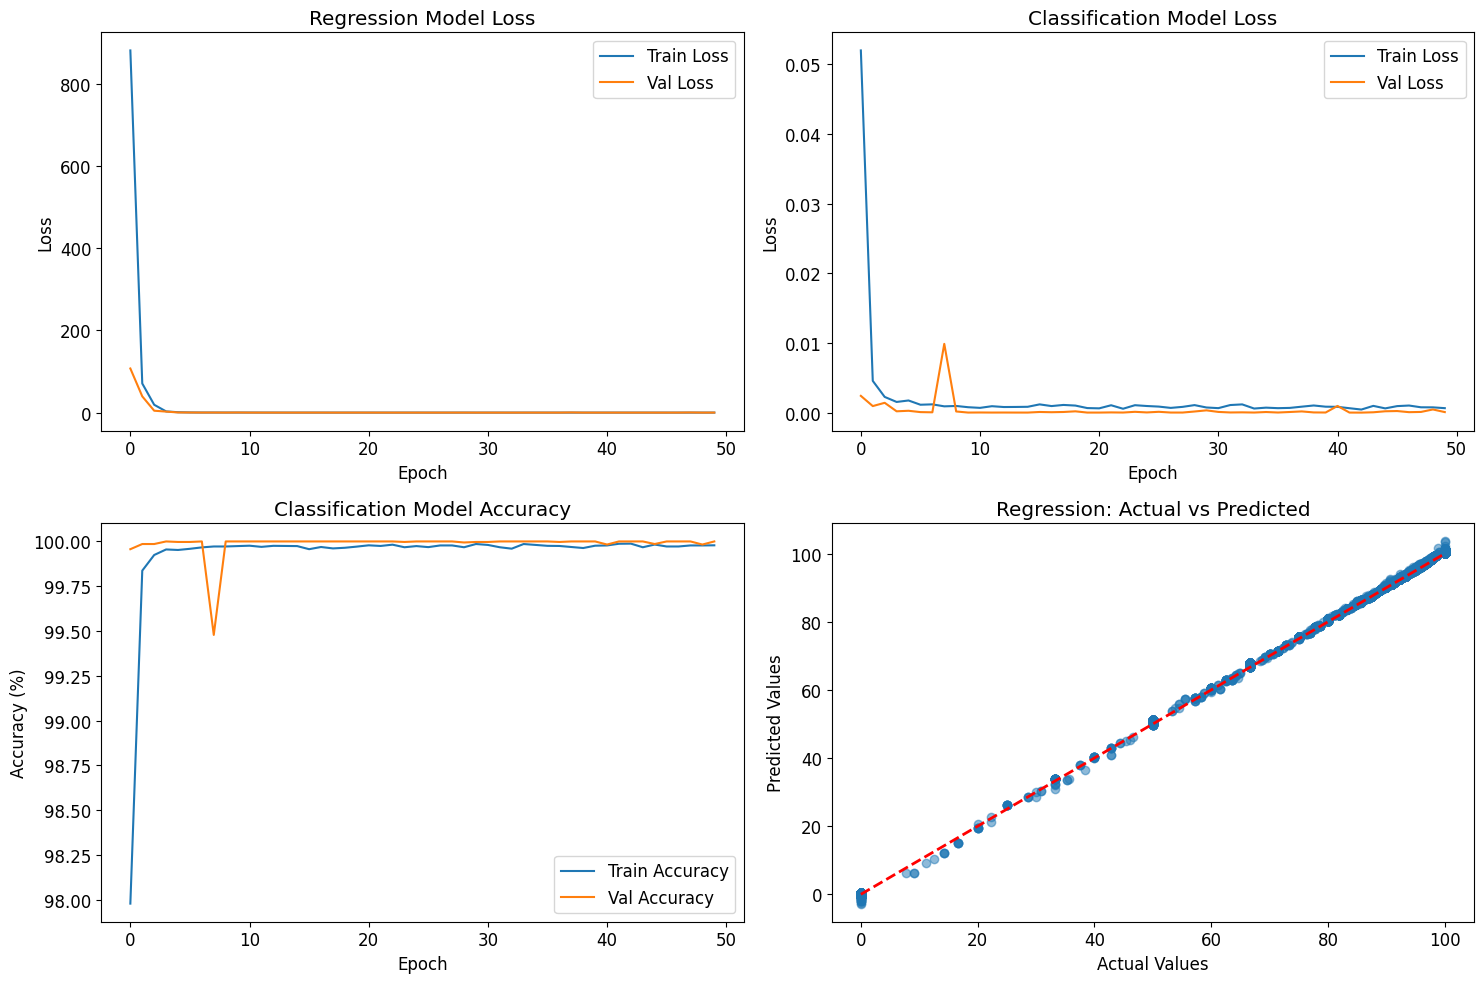


ПРОСТОЙ ПЕРСЕПТРОН ДЛЯ СРАВНЕНИЯ

Обучение простого персептрона для регрессии...
Обучение простого персептрона для классификации...

СРАВНЕНИЕ МОДЕЛЕЙ:

РЕГРЕССИЯ:
Нейронная сеть - MSE: 0.0724, R²: 0.9996
Простой персептрон - MSE: 115.9706, R²: 0.3598

КЛАССИФИКАЦИЯ:
Нейронная сеть - Accuracy: 1.0000
Простой персептрон - Accuracy: 0.9722

ОБУЧЕНИЕ ЗАВЕРШЕНО!


In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Предполагаем, что у нас есть DataFrame attendance_summary
print("Размер данных:", attendance_summary.shape)
print("\nПервые 5 строк:")
print(attendance_summary.head())

# =============================================================================
# ПОДГОТОВКА ДАННЫХ
# =============================================================================

# Создаем признаки и целевую переменную для регрессии
X = attendance_summary[['total_lessons', 'attended_lessons']].values
y_regression = attendance_summary['attendance_percentage'].values

# Создаем целевую переменную для классификации (бинарная: высокий/низкий процент посещаемости)
threshold = 75.0  # Порог для классификации
y_classification = (attendance_summary['attendance_percentage'] >= threshold).astype(int).values

print(f"\nРаспределение классов для классификации:")
print(pd.Series(y_classification).value_counts())
print(f"Порог для классификации: {threshold}%")

# Разделяем данные на тренировочные и тестовые
X_train, X_test, y_reg_train, y_reg_test = train_test_split(
    X, y_regression, test_size=0.2, random_state=42
)

X_train_clf, X_test_clf, y_clf_train, y_clf_test = train_test_split(
    X, y_classification, test_size=0.2, random_state=42
)

# Масштабируем признаки
scaler_reg = StandardScaler()
X_train_scaled = scaler_reg.fit_transform(X_train)
X_test_scaled = scaler_reg.transform(X_test)

scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

# Создаем DataLoader для PyTorch
def create_data_loader(X, y, batch_size=32, shuffle=True):
    tensor_x = torch.Tensor(X)
    tensor_y = torch.Tensor(y) if len(y.shape) == 1 else torch.Tensor(y)
    dataset = TensorDataset(tensor_x, tensor_y)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

batch_size = 64
train_loader_reg = create_data_loader(X_train_scaled, y_reg_train, batch_size)
test_loader_reg = create_data_loader(X_test_scaled, y_reg_test, batch_size, shuffle=False)

train_loader_clf = create_data_loader(X_train_clf_scaled, y_clf_train, batch_size)
test_loader_clf = create_data_loader(X_test_clf_scaled, y_clf_test, batch_size, shuffle=False)

# =============================================================================
# МОДЕЛИ PYTORCH
# =============================================================================

# Простая нейронная сеть для регрессии
class RegressionNN(nn.Module):
    def __init__(self, input_size):
        super(RegressionNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.network(x)

# Простая нейронная сеть для классификации
class ClassificationNN(nn.Module):
    def __init__(self, input_size, num_classes=2):
        super(ClassificationNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, num_classes)
        )

    def forward(self, x):
        return self.network(x)

# =============================================================================
# ОБУЧЕНИЕ МОДЕЛИ РЕГРЕССИИ
# =============================================================================

print("\n" + "="*50)
print("ОБУЧЕНИЕ МОДЕЛИ РЕГРЕССИИ")
print("="*50)

# Инициализация модели
input_size = X_train_scaled.shape[1]
model_reg = RegressionNN(input_size)
criterion_reg = nn.MSELoss()
optimizer_reg = optim.Adam(model_reg.parameters(), lr=0.001)

# Обучение
epochs = 50
train_losses_reg = []
val_losses_reg = []

for epoch in range(epochs):
    # Тренировка
    model_reg.train()
    train_loss = 0
    for batch_X, batch_y in train_loader_reg:
        optimizer_reg.zero_grad()
        predictions = model_reg(batch_X).squeeze()
        loss = criterion_reg(predictions, batch_y)
        loss.backward()
        optimizer_reg.step()
        train_loss += loss.item()

    # Валидация
    model_reg.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader_reg:
            predictions = model_reg(batch_X).squeeze()
            loss = criterion_reg(predictions, batch_y)
            val_loss += loss.item()

    train_losses_reg.append(train_loss / len(train_loader_reg))
    val_losses_reg.append(val_loss / len(test_loader_reg))

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_losses_reg[-1]:.4f}, Val Loss: {val_losses_reg[-1]:.4f}')

# =============================================================================
# ОБУЧЕНИЕ МОДЕЛИ КЛАССИФИКАЦИИ
# =============================================================================

print("\n" + "="*50)
print("ОБУЧЕНИЕ МОДЕЛИ КЛАССИФИКАЦИИ")
print("="*50)

# Инициализация модели
model_clf = ClassificationNN(input_size, num_classes=2)
criterion_clf = nn.CrossEntropyLoss()
optimizer_clf = optim.Adam(model_clf.parameters(), lr=0.001)

# Обучение
train_losses_clf = []
val_losses_clf = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    # Тренировка
    model_clf.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch_X, batch_y in train_loader_clf:
        optimizer_clf.zero_grad()
        outputs = model_clf(batch_X)
        loss = criterion_clf(outputs, batch_y.long())
        loss.backward()
        optimizer_clf.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y.long()).sum().item()

    # Валидация
    model_clf.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for batch_X, batch_y in test_loader_clf:
            outputs = model_clf(batch_X)
            loss = criterion_clf(outputs, batch_y.long())
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            val_total += batch_y.size(0)
            val_correct += (predicted == batch_y.long()).sum().item()

    train_losses_clf.append(train_loss / len(train_loader_clf))
    val_losses_clf.append(val_loss / len(test_loader_clf))
    train_accuracies.append(100 * correct / total)
    val_accuracies.append(100 * val_correct / val_total)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_losses_clf[-1]:.4f}, Val Loss: {val_losses_clf[-1]:.4f}')
        print(f'Train Accuracy: {train_accuracies[-1]:.2f}%, Val Accuracy: {val_accuracies[-1]:.2f}%')

# =============================================================================
# ОЦЕНКА МОДЕЛЕЙ
# =============================================================================

print("\n" + "="*50)
print("ОЦЕНКА МОДЕЛЕЙ")
print("="*50)

# Оценка регрессии
model_reg.eval()
with torch.no_grad():
    y_reg_pred = model_reg(torch.Tensor(X_test_scaled)).squeeze().numpy()

mse = mean_squared_error(y_reg_test, y_reg_pred)
mae = mean_absolute_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)

print("\nМЕТРИКИ РЕГРЕССИИ:")
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Оценка классификации
model_clf.eval()
with torch.no_grad():
    y_clf_pred_proba = model_clf(torch.Tensor(X_test_clf_scaled))
    _, y_clf_pred = torch.max(y_clf_pred_proba, 1)
    y_clf_pred = y_clf_pred.numpy()

accuracy = accuracy_score(y_clf_test, y_clf_pred)
print("\nМЕТРИКИ КЛАССИФИКАЦИИ:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_clf_test, y_clf_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_clf_test, y_clf_pred))

# =============================================================================
# ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ
# =============================================================================

# Графики потерь
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Потери регрессии
axes[0, 0].plot(train_losses_reg, label='Train Loss')
axes[0, 0].plot(val_losses_reg, label='Val Loss')
axes[0, 0].set_title('Regression Model Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# Потери классификации
axes[0, 1].plot(train_losses_clf, label='Train Loss')
axes[0, 1].plot(val_losses_clf, label='Val Loss')
axes[0, 1].set_title('Classification Model Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# Точность классификации
axes[1, 0].plot(train_accuracies, label='Train Accuracy')
axes[1, 0].plot(val_accuracies, label='Val Accuracy')
axes[1, 0].set_title('Classification Model Accuracy')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy (%)')
axes[1, 0].legend()

# Фактические vs Предсказанные значения для регрессии
axes[1, 1].scatter(y_reg_test, y_reg_pred, alpha=0.5)
axes[1, 1].plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Predicted Values')
axes[1, 1].set_title('Regression: Actual vs Predicted')

plt.tight_layout()
plt.show()

# =============================================================================
# ПРОСТОЙ ПЕРСЕПТРОН ДЛЯ СРАВНЕНИЯ
# =============================================================================

print("\n" + "="*50)
print("ПРОСТОЙ ПЕРСЕПТРОН ДЛЯ СРАВНЕНИЯ")
print("="*50)

# Простой персептрон для регрессии
class SimplePerceptronReg(nn.Module):
    def __init__(self, input_size):
        super(SimplePerceptronReg, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Простой персептрон для классификации
class SimplePerceptronClf(nn.Module):
    def __init__(self, input_size, num_classes=2):
        super(SimplePerceptronClf, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.linear(x)

# Обучение простого персептрона для регрессии
print("\nОбучение простого персептрона для регрессии...")
model_simple_reg = SimplePerceptronReg(input_size)
criterion_simple_reg = nn.MSELoss()
optimizer_simple_reg = optim.SGD(model_simple_reg.parameters(), lr=0.01)

for epoch in range(100):
    model_simple_reg.train()
    for batch_X, batch_y in train_loader_reg:
        optimizer_simple_reg.zero_grad()
        predictions = model_simple_reg(batch_X).squeeze()
        loss = criterion_simple_reg(predictions, batch_y)
        loss.backward()
        optimizer_simple_reg.step()

# Обучение простого персептрона для классификации
print("Обучение простого персептрона для классификации...")
model_simple_clf = SimplePerceptronClf(input_size, num_classes=2)
criterion_simple_clf = nn.CrossEntropyLoss()
optimizer_simple_clf = optim.SGD(model_simple_clf.parameters(), lr=0.01)

for epoch in range(100):
    model_simple_clf.train()
    for batch_X, batch_y in train_loader_clf:
        optimizer_simple_clf.zero_grad()
        outputs = model_simple_clf(batch_X)
        loss = criterion_simple_clf(outputs, batch_y.long())
        loss.backward()
        optimizer_simple_clf.step()

# Оценка простых моделей
model_simple_reg.eval()
with torch.no_grad():
    y_simple_reg_pred = model_simple_reg(torch.Tensor(X_test_scaled)).squeeze().numpy()

mse_simple = mean_squared_error(y_reg_test, y_simple_reg_pred)
r2_simple = r2_score(y_reg_test, y_simple_reg_pred)

model_simple_clf.eval()
with torch.no_grad():
    y_simple_clf_proba = model_simple_clf(torch.Tensor(X_test_clf_scaled))
    _, y_simple_clf_pred = torch.max(y_simple_clf_proba, 1)
    y_simple_clf_pred = y_simple_clf_pred.numpy()

accuracy_simple = accuracy_score(y_clf_test, y_simple_clf_pred)

print("\nСРАВНЕНИЕ МОДЕЛЕЙ:")
print("\nРЕГРЕССИЯ:")
print(f"Нейронная сеть - MSE: {mse:.4f}, R²: {r2:.4f}")
print(f"Простой персептрон - MSE: {mse_simple:.4f}, R²: {r2_simple:.4f}")

print("\nКЛАССИФИКАЦИЯ:")
print(f"Нейронная сеть - Accuracy: {accuracy:.4f}")
print(f"Простой персептрон - Accuracy: {accuracy_simple:.4f}")

print("\n" + "="*50)
print("ОБУЧЕНИЕ ЗАВЕРШЕНО!")
print("="*50)